# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

import numpy as np
import pandas as pd
import random

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [9]:
# your answer here
temp = pd.read_csv("Temp_States.csv")


#### Print `temp`

In [10]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [11]:
# your answer here
temp.dtypes
#Tenemos 2 columnas de objetos y otra con floats(decimales)

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [19]:
# your answer here
temp2 = temp.iloc[0:3]
temp2

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [20]:
# your answer here
temp2.Temperature.mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [29]:
# your answer here
temp.style.applymap(lambda x : "color: red" if x < 15 else "color: black")

#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
# your answer here

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
# your answer here


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [10]:
# your answer here


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [25]:
# your answer here
employee = pd.read_csv("Employee.csv")
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [26]:
# your answer here
employee.dtypes


Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

In [13]:
# your answer here

#### What's the average salary in this company?

In [30]:
# your answer here
employee.Salary.mean()

48.888888888888886

#### What's the highest salary?

In [31]:
# your answer here
employee.Salary.max()

70

#### What's the lowest salary?

In [32]:
# your answer here
employee.Salary.min()

30

#### Who are the employees with the lowest salary?

In [34]:
# your answer here
low = employee.set_index("Salary")
low

,Name,Department,Education,Gender,Title,Years
Salary,,,,,,
35,Jose,IT,Bachelor,M,analyst,1
30,Maria,IT,Master,F,analyst,2
30,David,HR,Master,M,analyst,2
35,Sonia,HR,Bachelor,F,analyst,4
55,Samuel,Sales,Master,M,associate,3
55,Eva,Sales,Bachelor,F,associate,2
70,Carlos,IT,Master,M,VP,8
60,Pedro,IT,Phd,M,associate,7
70,Ana,HR,Master,F,VP,8


In [ ]:
low.loc["70"]

In [38]:
employee.iloc[1:3]

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [39]:
# your answer here
employee.iloc[2:3]

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [43]:
# your answer here
employee.iloc[2:3, [6,6]]

,Salary,Salary
2,30,30


#### Print all the rows where job title is associate

In [19]:
# your answer here

#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [44]:
# your answer here- 1 method
employee.iloc[0:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [46]:
# your answer here- 2nd method
titulo = employee.set_index("Title")
titulo

,Name,Department,Education,Gender,Years,Salary
Title,,,,,,
analyst,Jose,IT,Bachelor,M,1,35
analyst,Maria,IT,Master,F,2,30
analyst,David,HR,Master,M,2,30
analyst,Sonia,HR,Bachelor,F,4,35
associate,Samuel,Sales,Master,M,3,55
associate,Eva,Sales,Bachelor,F,2,55
VP,Carlos,IT,Master,M,8,70
associate,Pedro,IT,Phd,M,7,60
VP,Ana,HR,Master,F,8,70


In [49]:
titulo.loc["analyst"].head(3)

,Name,Department,Education,Gender,Years,Salary
Title,,,,,,
analyst,Jose,IT,Bachelor,M,1,35
analyst,Maria,IT,Master,F,2,30
analyst,David,HR,Master,M,2,30


#### Find the employees who's title is associate and the salary above 55?

In [52]:
# your answer here
filtrado = employee.loc[(employee["Salary"] > 55)]
filtrado


,Name,Department,Education,Gender,Title,Years,Salary
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [55]:
# your answer here
employee.groupby(["Salary"])

####  What is the average Salary per title?

In [56]:
# your answer here
employee.groupby(["Salary"]).mean()

,Years
Salary,
30,2.0
35,2.5
55,2.5
60,7.0
70,8.0


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

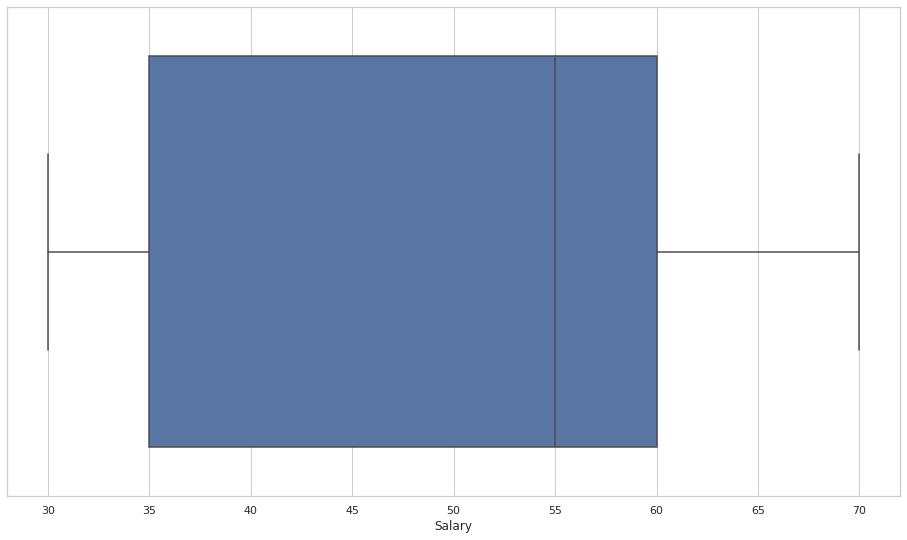

In [57]:
# draw boxplot here
sns.boxplot(x="Salary", data=employee)

In [27]:
# print first quartile here

In [28]:
# print third quartile here

#### Is the mean salary per gender different?

In [65]:
employee.groupby(["Gender", "Salary"]).mean()

Years
Gender Salary       
F      30          2
       35          4
       55          2
       70          8
M      30          2
       35          1
       55          3
       60          7
       70          8

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [30]:
# your answer here

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [68]:
# your answer here
order = pd.read_csv("Orders.zip")
order

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [72]:
# your answer here
order.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [ ]:
# your answer here

####  What is the average Purchase Price?

In [73]:
# your answer here
order.UnitPrice.mean()

3.116174480549152

#### What were the highest and lowest purchase prices? 

In [74]:
# your answer here
order.UnitPrice.max()

8142.75

In [75]:
# your answer here
order.UnitPrice.min()

0.0

#### Select all the customers we have in Spain

In [76]:
# your answer here
order2 = order.set_index("Country")
order2

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,amount_spent
Country,,,,,,,,,,,,,
United Kingdom,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,15.30
United Kingdom,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,20.34
United Kingdom,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,22.00
United Kingdom,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,20.34
United Kingdom,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
France,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,10.20
France,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,12.60
France,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,16.60


In [77]:
order2.loc["Spain"].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,amount_spent
Country,,,,,,,,,,,,,
Spain,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,115.5
Spain,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,145.0
Spain,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,99.0
Spain,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,115.5
Spain,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,145.0


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [ ]:
# your answer here

#### Select all the customers who have bought more than 50 items ?

In [ ]:
# your answer here

#### Select orders from Spain that are above 50 items

In [ ]:
# your answer here

#### Select all free orders

In [ ]:
# your answer here

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [ ]:
# your answer here

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [ ]:
# your answer here

#### Show the frequency distribution of the amount spent in Spain.

In [ ]:
# your answer here

#### Select all orders made in the month of August

In [ ]:
# your answer here

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [ ]:
# your answer here

#### What's the  average amount of money spent by country

In [ ]:
# your answer here

#### What's the most expensive item?

In [ ]:
# your answer here

#### What was the average amount spent per year ?

In [ ]:
# your answer here